### hypothysis function

h(x) = theta0 * x0 + theta1 * x1

here ,
theta0 and theta1 are the parameters which when multiplied with data will gives us a straight line.
x0 is column added with default value of 1.
x1 is the data
y is result column

In [4]:
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

%matplotlib inline

In [5]:
data = np.loadtxt(os.path.join('Data', 'data1.txt'), delimiter=',')

In [7]:
X, y = data[:, 0], data[:, 1]

m = y.size 

here ,

X is features .
y is the result .
m is total number of rows ( total number of examples ).

### plotting the data

In [62]:
def plotData(X,y):
    pyplot.plot(X, y, 'bo', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

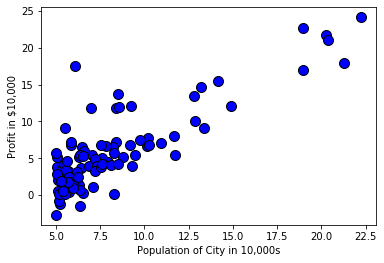

In [63]:
plotData(X[:,-1],y)

### cost function

the objective of linear regression is to minimize cost function which is nothing but sum of sqaures of diffrence between hypothisis function and actual result

J(theta) = 1/2m * square of (hypothsis(X(i))-y(i))

here i loops from 0 to m-1

### gradient descent

theta = theta - alpha * partial diffrentiation w.r.t theta(i) of J(theta)

here 
alpha is learning rate

thus solving above equation will give us

theta(j)  = theta(j) - (1/m) * aplha * { (h(x(i)) - y(i)) * x(j)(i) }   

here j loops from 0 to n where n is number of features

In [10]:
X = np.stack([np.ones(m),X],axis=1)

In [12]:
def computecost(X,y,theta):
    m=y.size
    J=0
    h=np.dot(X,theta)
    J = (1/(2*m)) * np.sum(np.square(np.dot(X,theta)-y))
    return J

In [13]:
computecost(X,y,[0,0])

32.072733877455676

In [15]:
computecost(X,y,[1,1])

10.266520491383504

In [44]:
def gradientdescent(X,y,theta,alpha,num_iters):
        m = y.shape[0]
        theta = theta.copy()
        J_history = []
        
        for i in range(num_iters):
            theta = theta - (alpha/m)*((np.dot(X,theta)-y).dot(X))
            J_history.append([i,computecost(X,y,theta)])
        
        return theta,J_history

In [53]:
theta1 , J_history = gradientdescent(X,y,[0,0],0.01,2000)

In [54]:
theta1

array([-3.78806857,  1.18221277])

In [56]:
J_history[1999]

[1999, 4.47802760987997]

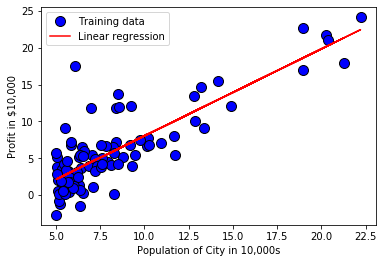

In [65]:
plotData(X[:,-1],y)
pyplot.plot(X[:,-1],np.dot(X,theta1),'r-')
pyplot.legend(['Training data', 'Linear regression']);

In [66]:
def predict(X,theta):
    return np.dot(X,theta)

In [67]:
predict([1,6],theta1)

3.305208075821151

this means for the population of 6000 we get profit of 33.05 thousand $